<a href="https://colab.research.google.com/github/KeysiYTS/titanic-survivor-prediction/blob/dev/Titanic_survivor_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### General Info:

Dataset:  [Kaggle Titanic](https://www.kaggle.com/c/titanic/data)

Variable Notes  
**pclass**: A proxy for socio-economic status (SES)  
- 1st = Upper  
- 2nd = Middle  
- 3rd = Lower    
  
**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

**sibsp**: The dataset defines family relations in this way...  
- Sibling = brother, sister, stepbrother, stepsister  
- Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**: The dataset defines family relations in this way... 
- Parent = mother, father  
- Child = daughter, son, stepdaughter, stepson  
- Some children travelled only with a nanny, therefore parch=0 for them.  

**cabin** =	Cabin number  
**ticket** =	Ticket number  
**embarked** =	Port of Embarkation	  
C = Cherbourg,  
Q = Queenstown,  
S = Southampton

### Code

In [ ]:
train_filepath = '/content/drive/MyDrive/0. Machine Learning/Projetos/Titanic_survivor/train.csv'
test_filepath = '/content/drive/MyDrive/0. Machine Learning/Projetos/Titanic_survivor/test.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
import graphviz
from sklearn.dummy import DummyClassifier

In [ ]:
dataset = pd.read_csv(train_filepath)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [ ]:
dataset.columns = dataset.columns.str.lower()

In [ ]:
dataset

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


At first, I think I can remove the columns `passengerid`, `name`, `ticket`,`cabin` and `embarked`.

In [ ]:
new_dataset = dataset.drop(columns =['passengerid', 'name', 'ticket', 'cabin', 'embarked'])

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [ ]:
new_dataset.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

### Data Analysis

In [ ]:
sex_dict = {'male': 0,
            'female': 1}

new_dataset.replace(to_replace=sex_dict,
                    inplace = True)

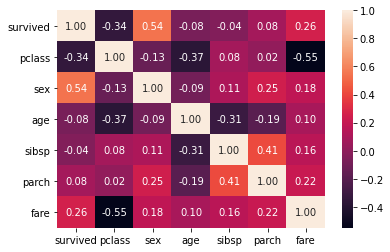

In [ ]:
correlations = new_dataset.corr()
sns.heatmap(correlations, annot=True, fmt = '.2f')

In [ ]:
correlations[correlations > .5].sum()

survived    1.543351
pclass      1.000000
sex         1.543351
age         1.000000
sibsp       1.000000
parch       1.000000
fare        1.000000
dtype: float64

There's a relevant correlation between sex and "survival". I'll explore.

In [ ]:
dataset['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
dataset['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
male_survived = dataset.loc[(dataset['sex'] == 'male') & (dataset['survived'] == 1)]
male_survived.shape

(109, 12)

In [ ]:
109/342*100

31.871345029239766

In [ ]:
female_survived = dataset.loc[(dataset['sex'] == 'female') & (dataset['survived'] == 1)]
female_survived.shape

(233, 12)

In [ ]:
print("Based on that, %.2f%% of the survivors were 'female', while %.2f%% were 'male'" % ((female_survived.shape[0]/342*100), (male_survived.shape[0]/342*100))) 

Based on that, 68.13% of the survivors were 'female', while 31.87% were 'male'


now let me check what is the representation of `female` and `male` in the total

In [ ]:
print("On the total of passenger, %.2f%% were female and %.2f%% were male" % (314/891*100, 577/891*100))

On the total of passenger, 35.24% were female and 64.76% were male


In [ ]:
survivors = dataset.loc[(dataset['survived'] == 1)]
survivors.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Figure size 576x576 with 0 Axes>

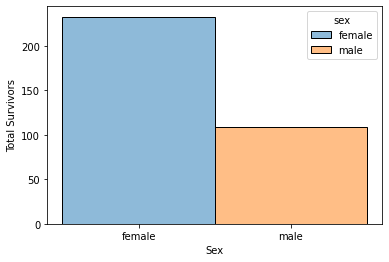

<Figure size 576x576 with 0 Axes>

In [ ]:
sns.histplot(data=survivors,
            x=survivors['sex'],
            hue = survivors['sex'])

plt.xlabel('Sex')
plt.ylabel('Total Survivors')
plt.figure(figsize=(8,8))

What I want to do next is to see, in those groups os survivors, how many were children (12 years old or less)

In [ ]:
survivors['age'].isnull().sum()

52

In [ ]:
survivors['age'].fillna(survivors['age'].median(), inplace = True)
survivors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  342 non-null    int64  
 1   survived     342 non-null    int64  
 2   pclass       342 non-null    int64  
 3   name         342 non-null    object 
 4   sex          342 non-null    object 
 5   age          342 non-null    float64
 6   sibsp        342 non-null    int64  
 7   parch        342 non-null    int64  
 8   ticket       342 non-null    object 
 9   fare         342 non-null    float64
 10  cabin        136 non-null    object 
 11  embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
male_children = survivors.loc[(survivors['sex'] == 'male') & (survivors['age'] <= 12)].shape[0]
male_children

21

In [ ]:
female_children = survivors.loc[(survivors['sex'] == 'female') & (survivors['age'] <= 12)].shape[0]
female_children

19

from the 109 `male` survivors 21 were `children` with 12 years old or less, whilst from the 233 female survivors, 19 were `children`

In [ ]:
print("From 109 male survivors, %.2f%% were children and from the 233, %.2f%% were children" % ((male_children/109*100), (female_children/233*100)))

From 109 male survivors, 19.27% were children and from the 233, 8.15% were children


In [ ]:
new_dataset.drop(columns=['pclass', 'parch'], inplace= True)

In [ ]:
new_dataset.head()

,survived,sex,age,sibsp,fare
0,0,0,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,1,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,0,35.0,0,8.0500


In [ ]:
new_dataset.isnull().sum()

survived      0
sex           0
age         177
sibsp         0
fare          0
dtype: int64

In [ ]:
new_dataset.dropna(subset=['age'], axis=0, inplace=True)
new_dataset.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
fare        0
dtype: int64

In [ ]:
new_dataset.shape

(714, 5)

### Treating the `Test` dataset

In [ ]:
test_dataset = pd.read_csv(test_filepath)
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
new_testdataset = test_dataset.drop(columns=['PassengerId', 'Pclass', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
new_testdataset.head()

,Sex,Age,SibSp,Fare
0,male,34.5,0,7.8292
1,female,47.0,1,7.0000
2,male,62.0,0,9.6875
3,male,27.0,0,8.6625
4,female,22.0,1,12.2875


In [ ]:
new_testdataset.columns = new_testdataset.columns.str.lower()
new_testdataset.head()

,sex,age,sibsp,fare
0,male,34.5,0,7.8292
1,female,47.0,1,7.0000
2,male,62.0,0,9.6875
3,male,27.0,0,8.6625
4,female,22.0,1,12.2875


In [ ]:
sex_dict = {'male': 0,
            'female': 1}

new_testdataset['sex'].replace(to_replace=sex_dict,
                               inplace = True)
new_testdataset.head()

,sex,age,sibsp,fare
0,0,34.5,0,7.8292
1,1,47.0,1,7.0000
2,0,62.0,0,9.6875
3,0,27.0,0,8.6625
4,1,22.0,1,12.2875


In [ ]:
new_testdataset.isnull().sum()

sex       0
age      86
sibsp     0
fare      1
dtype: int64

In [ ]:
new_testdataset['age'].fillna(new_dataset['age'].median(), inplace = True)

In [ ]:
new_testdataset.isnull().sum()

sex      0
age      0
sibsp    0
fare     1
dtype: int64

In [ ]:
new_testdataset.dropna(subset=['fare'], axis=0, inplace=True)

In [ ]:
new_testdataset.isnull().sum()

sex      0
age      0
sibsp    0
fare     0
dtype: int64

## Models

In [ ]:
x = new_dataset.drop(columns=['survived'])
y = new_dataset['survived']

In [ ]:
x.shape, y.shape

((714, 4), (714,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 64)

### Dummy Baseline

In [ ]:
bsline = DummyClassifier(strategy='most_frequent',
                         random_state = 64)

bsline.fit(x, y)

DummyClassifier(constant=None, random_state=64, strategy='most_frequent')

In [ ]:
bsline.score(x_test, y_test)

0.6083916083916084

### Random Forest Model

In [ ]:
rdforest = RandomForestClassifier(max_depth=3, random_state=64)
rdforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=64, verbose=0,
                       warm_start=False)

In [ ]:
print('The Random Forest model Accuracy is %.2f%%' % (rdforest.score(x_test, y_test)*100))

The Random Forest model Accuracy is 86.01%


Testing the possible depths, the `max_depth` = 3 was the most effective

### Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=64)
dtree.fit(x_train,y_train)
print('The Decision Tree model Accuracy is %.2f%%' % (dtree.score(x_test, y_test)*100))

The Decision Tree model Accuracy is 85.31%


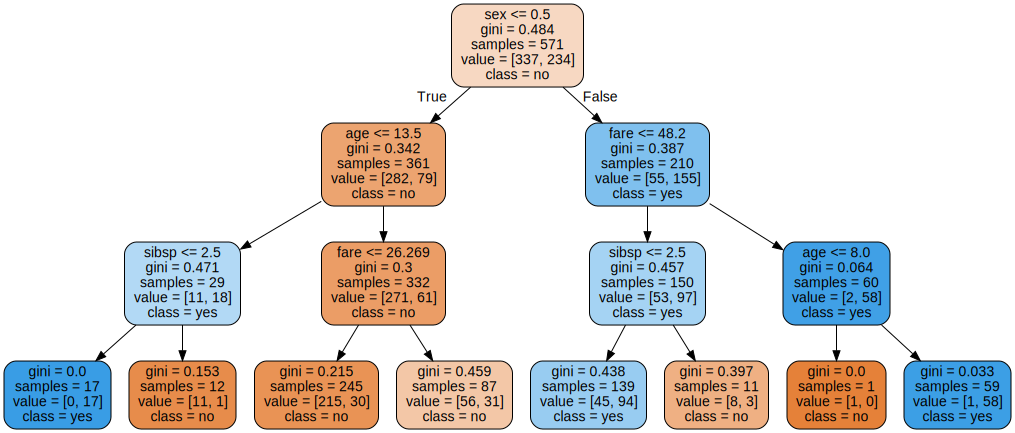

In [ ]:
# outfile -> define the file where the graph should be written
# features -> the analized attibute
# filled -> Colorize boxes
# rounded -> round the vertices
# class name -> bought or no
features = x.columns
dot_data = export_graphviz(dtree, out_file=None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           class_names = ['no', 'yes'])
graphviz.Source(dot_data)

### Linear SVC

In [ ]:
lsvc = LinearSVC(random_state=64,
                 dual = False)
lsvc.fit(x_train, y_train)

print('The Linear SVC model Accuracy is %.2f%%' % (lsvc.score(x_test, y_test)*100))

The Linear SVC model Accuracy is 81.12%


## Conclusion